In [1]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score


In [2]:
#LOAD DATASET
df = pd.read_csv("test.csv")


In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
25975,25975,34799,Female,Loyal Customer,42,Personal Travel,Eco,264,2,5,...,1,1,2,1,1,1,1,0,0.0,neutral or dissatisfied


In [5]:
df.shape

(25976, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [7]:
#DATA CLEANING
#Handle missing values

df['Arrival Delay in Minutes'].fillna(
    df['Arrival Delay in Minutes'].median(), inplace=True
)

C:\Users\dell\AppData\Local\Temp\ipykernel_13560\1161816183.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(


In [8]:
#Remove duplicates
df.drop_duplicates(inplace=True)


In [9]:
#ENCODING (Categorical → Numerical)
le = LabelEncoder()

categorical_cols = [
    'Gender',
    'Customer Type',
    'Type of Travel',
    'Class',
    'satisfaction'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  

In [10]:
#FEATURE SELECTION
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']


In [11]:
#FEATURE SCALING 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42
)

In [13]:
#LOGISTIC REGRESSION – ACCURACY (%)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy: {:.2f}%".format(
    accuracy_score(y_test, y_pred_lr) * 100
))

Logistic Regression Accuracy: 86.76%


In [14]:
# DECISION TREE – ACCURACY (%)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy: {:.2f}%".format(
    accuracy_score(y_test, y_pred_dt) * 100
))

Decision Tree Accuracy: 93.26%


In [21]:
# RANDOM FOREST – ACCURACY (%)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy: {:.2f}%".format(
    accuracy_score(y_test, y_pred_rf) * 100
))

Random Forest Accuracy: 95.11%


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear')   # faster
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

#print("SVM Accuracy: {:.2f%".format(accuracy_score(y_test, y_pred_svm)*100, "%")
print("SVM Accuracy:",accuracy_score(y_test,y_pred_svm)*100,"%")
      

SVM Accuracy: 87.29792147806005 %


In [18]:
# KNN – ACCURACY (%)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy: {:.2f}%".format(
    accuracy_score(y_test, y_pred_knn) * 100
))

KNN Accuracy: 91.49%


In [19]:
# NAIVE BAYES – ACCURACY (%)
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy: {:.2f}%".format(
    accuracy_score(y_test, y_pred_nb) * 100
))

Naive Bayes Accuracy: 85.32%


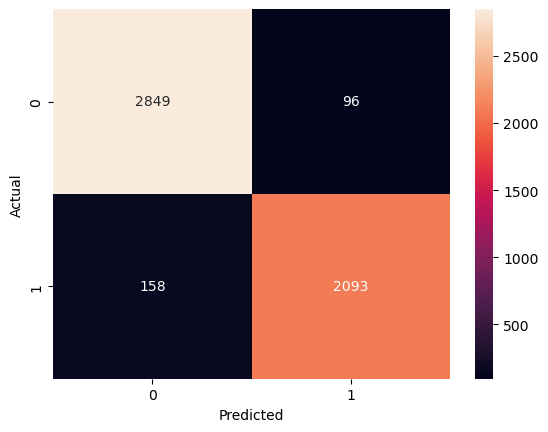

In [20]:
#Confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
Among all the models trained, Random Forest achieved the highest accuracy of 95.11%
and was selected as the final model.              

